# Inferência Estatística
Tem por objetivo fazer afirmações a partir de um conjunto de valores ou uma amostra em relação a uma população (que representa o todos deste universo pesquisado). Para realizar esse trabalho, o estatístico coleta informações do tipo amostral mas também na literatura.

Conceitos Fundamentais Implícitos:

- **Viés**: Viés ou erro sistemático é a distorção entre a medida de uma variável estatística e o valor real da grandeza a estimar. A introdução de um viés no cálculo estatístico pode estar ligada quer a imperfeição ou deformação da amostra (estatística) que serve de base para a estimativa, quer ao próprio método de avaliação. 

- **Intervalos de confiança**:  Intervalo de confiança (IC) é um tipo de estimativa por intervalo de um parâmetro populacional desconhecido. Quando se tem 99% de confiança de que o valor real do parâmetro está no intervalo de confiança, significa que 99% dos intervalos de confiança observados têm o valor real do parâmetro.

- **Testes de hipóteses**: ou teste de significância é um procedimento estatístico que permite tomar uma decisão (aceitar ou rejeitar a hipótese).

- **Curva Normal:**

<br>
<img src="img/despad.png" width="550" />
<br>

## Exemplo (1): Fomos contratados por uma empresa de loteria para pesquisar a proporção de clientes que compra determinado produto. A empresa manterá seu atual planejamento de marketing se a sua participação de mercado for de 50% ou mais, caso contrário, ela triplicará seus gastos em publicidade. 

- Hipótese Nula ($H_0$): 50% ou mais do mercado compra na lotérica (sem investimento adicional em MKT)
- Hipeotese Alternativa ($H_1$): menos de 50% do mercado compra na lotérica (triplicar o investimento em MKT)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

A base de dados será criada com o numpy.binomial como um teste de 120 observações aleatórias com valores 0 e 1 (que define se o cliente compra ou não na casa lotérica), com parâmetro de distribuição p=0.4 (que define o target da média).

Estes dados teoricamente seriam obtidos pela realização de entrevistas com as pessoas nas imediações da casa lotérica para apurar quantas pessoas são clientes e quantas não são clientes.

In [2]:
p=0.4       # Definição do target (teórico)
testes=1
obs=120     # Número de Observações

np.random.seed(seed=42)

df = pd.DataFrame([int(n) for n in np.random.binomial(testes, p, obs, )], columns= ['compra_ou_não'])
df.head(10)

# soma de 1's / total de linhas = obs

,compra_ou_não
0,0
1,1
2,1
3,0
4,0
5,0
6,0
7,1
8,1
9,1


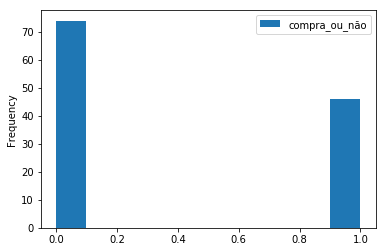

In [3]:
df.plot.hist()

In [4]:
df.describe()

,compra_ou_não
count,120.000000
mean,0.383333
std,0.488237
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
variancia_teorica = p*(1-p)
variancia_teorica

0.24

In [6]:
# calculando a média
market_share_amostral=df.compra_ou_não.sum()/len(df.compra_ou_não)
market_share_amostral

0.38333333333333336

In [7]:
#calculando a variância e o desvio padrão
std = df.std()
var = df.std()**2
print('Desvio-Padrão:',std)
print('Varância:',var)

Desvio-Padrão: compra_ou_não    0.488237
dtype: float64
Varância: compra_ou_não    0.238375
dtype: float64


### Formulando a hipótese a ser testada

Segundo o teste de hipóteses, caso o market share da lotérica seja maior que 50% o investimento deve se manter o mesmo (não triplicar), ou seja, se $p(H_0) > 0.5$ não rejeitamos a hipótese. Neste caso conhecemos a média e a variância amostral.

Será utilizada a média amostral padronizada do ponto anterior como estatístico de teste. Adotando o nível de significância de 0.95, está sendo buscada uma regra que deixe um valor de $p > 0.05$ de rejeição quando H0 for verdadeira.

In [8]:
# Calculando manualmente, com base na fórmula (utilizando o z-score nominal para população)
mean = df.compra_ou_não.mean()
sigma = df.compra_ou_não.std()
n = len(df.compra_ou_não)

mean - 1.96*sigma/np.sqrt(n), mean + 1.96*sigma/np.sqrt(n)
# da tabela Z-Score: 0.95 / 2 = 0.4750 --> 1.96

(0.2959766533226802, 0.4706900133439865)

In [9]:
# Calculando o intervalo de confiança pelo Scipy.Stats
st.norm.interval(alpha=0.95, loc=mean, scale=sigma/np.sqrt(n))

(0.295978258522175, 0.4706884081444917)

In [10]:
limite_inferior = st.norm.interval(alpha=0.95, loc=mean, scale=sigma/np.sqrt(n))[0]
limite_superior = st.norm.interval(alpha=0.95, loc=mean, scale=sigma/np.sqrt(n))[1]

In [11]:
# Comparando com a hopótese

p_H0 = 0.5

limite_inferior < p_H0 < limite_superior

False

Podemos perceber que o valor de p_Ho=0.5 também está fora do intervalo de confiança (zona de rejeição), o que nos faz rejeitar a hipótese Ho.

### p-value

In [16]:
# p-value por Scipy.Stats para a normal
p_value = st.norm(mean, sigma/np.sqrt(n)).sf(0.5)
p_value

0.004427256462693125

In [15]:
from math import fabs
# Comparando
fabs(p_value) > 0.05

False

o p-value está fora do intervalo de confiança (menos que 0.05 em módulo), portanto reforçamos a mesma conclusão de rejeitar a hipótese Ho.

In [17]:
# Calculando as estatísticas por Scipy.Stats para t-student (retorna o Z-score amostral e o p-value)

st.ttest_1samp(df.compra_ou_não, 0.5) 

Ttest_1sampResult(statistic=-2.617620846382675, pvalue=0.010004294006988495)

In [18]:
# Cálculo do Z-score para a amostra
p_H0=0.5
z_teste = (market_share_amostral-p_H0) / (std/(obs**(0.5)))
z_teste

compra_ou_não   -2.617621
dtype: float64

In [19]:
#A decisão é...

z_score = 1.96 # Z score para a significância de 95% é de -1.96 a 1.96

from math import fabs # fabs retorna o módulo do valor.
fabs(z_teste) < fabs(z_score)

False

O valor do z-score=-2.62 para a p_Ho=0.5 não está contido no intervalo de confiança com alpha=0.05, pois está fora do intervalo crítico(-1.96 <--> 1.96). Vamos confirmar esta condição pelos outros indicadores.

In [20]:
# calculando o alpha máximo para o valor da hipótese
alpha_max = 1-st.norm(mean, sigma/np.sqrt(n)).sf(0.5)
alpha_max

0.9955727435373068

[Text(0, 0.5, 'density'), Text(0.5, 0, 'conversion rate')]

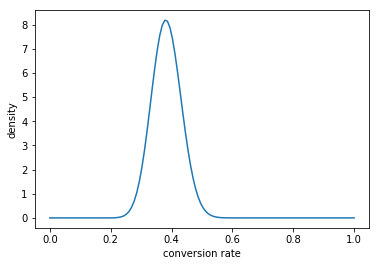

In [21]:
# plotando a curva beta dos dados para verificar o comportamento da distribuição
from scipy.stats import beta
import matplotlib.pyplot as plt

# Para o gráfico
fig, ax = plt.subplots(1, 1) 

# Gerando a distribuição
beta_distribution = beta(100*market_share_amostral,100-100*market_share_amostral)

# Plotando a destribuição

x = np.linspace(0., 1.0, 120)

ax.plot(x, beta_distribution.pdf(x))

ax.set(xlabel='conversion rate', ylabel='density')